In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [ ]:
class Agent():

  def __init__(self, n_genes, generation_interval):
    self.n_genes = n_genes
    self.fitness = None
    self.value =[]
    self.init_genes(generation_interval)

  def init_genes(self, generation_interval):
    a = generation_interval[0]
    b = generation_interval[1]
    for _ in range(self.n_genes):
      allele = random.uniform(a, b)
      self.value.append(allele)

  def set_value(self, value):
    self.value = value

  def set_fitness(self, fitness):
    self.fitness = fitness

  def n_genes(self):
    return len(self.value)

  def __str__(self):
    return "value:"+str(self.value)+"Fitness: "+str(self.fitness)

In [ ]:
class GeneticAlgorithm():

  def __init__(self, sys_eq, b, generation_interval, _elitism = 2,
               _selection = 2, _crossover_prob = 0.9, _mutation_prob = 0.02,
               max_generations = 1000, tolerance = 0.1, n_population = 1000):
    self.sys_eq = sys_eq
    self.b = b
    self.generation_interval = generation_interval
    self.agents = []
    self._elitism = _elitism
    self._selection = _selection
    self._crossover_prob = _crossover_prob
    self._mutation_prob = _mutation_prob
    self.max_generations = max_generations
    self.tolerance = tolerance
    self.n_population = n_population
    

  def init_population(self):
    n_genes = len(sys_eq[0])
    for _ in range(self.n_population):
      new_agent = Agent(n_genes, self.generation_interval)
      self.agents.append(new_agent)


  def fitness_func(self, agent):
    fitness_func_values = []
    for eq in sys_eq:
      value = np.dot(agent.value, eq)
      fitness_func_values.append(value)
    return fitness_func_values


  def fitness(self, agent):
    fitness = 0
    fitness_func_values = self.fitness_func(agent)
    for i in range(len(self.b)):
      fitness = fitness + abs(self.b[i] - fitness_func_values[i])
    agent.set_fitness(fitness)


  def sort_agents(self):
    fitness = lambda agent: agent.fitness
    self.agents.sort(key=fitness)


  def elitism(self):

    self.sort_agents()
    best_agents = []
    for i in range(self._elitism):
      best_agents.append(self.agents[i])
    return best_agents


  def selection(self):
    parent_choices = random.choices(self.agents, k=self._selection)

    fitness = lambda agent: agent.fitness
    parent_choices.sort(key=fitness)
    best_random_parent = parent_choices[0]

    random_parent = random.choice(self.agents)

    return best_random_parent, random_parent

  
  def crossover(self, parents):

    parent1 = parents[0]
    parent2 = parents[1]

    parent1_splitted = [[],[]]
    parent2_splitted = [[],[]]

    current_crossover_prob = random.random()

    if(current_crossover_prob <= self._crossover_prob):
      
      n_genes = len(sys_eq[0])
      split_point = random.randint(0, n_genes-1)

      for i in range(n_genes):
        if i<= split_point:
          parent1_splitted[0].append(parent1.value[i])

      for i in range(n_genes):
        if i > split_point:
          parent1_splitted[1].append(parent1.value[i])

      for i in range(n_genes):
        if i<= split_point:
          parent2_splitted[0].append(parent2.value[i])

      for i in range(n_genes):
        if i > split_point:
          parent2_splitted[1].append(parent2.value[i])

      child1_values = []
      
      for value in parent1_splitted[0]:
        child1_values.append(value)
      
      for value in parent2_splitted[1]:
        child1_values.append(value)


      child2_values = []

      for value in parent2_splitted[0]:
        child2_values.append(value)
      
      for value in parent1_splitted[1]:
        child2_values.append(value)

      child1 = Agent(n_genes, self.generation_interval)
      child1.set_value(child1_values)

      child2 = Agent(n_genes, self.generation_interval)
      child2.set_value(child2_values)

      return child1, child2
    return parent1, parent2

  def mutation(self, agents):

    agent = random.choice(agents)
    other_agent = agents[0]
    
    if(other_agent == agent):
      other_agent = agents[1]

    curren_mutation_prob = random.random()

    if(curren_mutation_prob <= self._mutation_prob):
      n_genes = len(sys_eq[0])
      gen_to_mutate = random.randint(0, n_genes)

      a = self.generation_interval[0]
      b = self.generation_interval[1]
      mutated_allele = random.uniform(a, b)

      agent_value = agent.value

      for i in range(n_genes):
        if(i == gen_to_mutate):
          agent_value[i] = mutated_allele

      agent.set_value(agent_value)
    return agent, other_agent

  def best_agent(self):
    self.sort_agents()
    return self.agents[0]


  def execute(self):
    #poblacion inicial
    self.init_population()
    
    #valores iniciales
    temp_population = []
    current_generation = 0
    current_err = 100

    #error del mejor agente de cada epoca
    err = []

    #evaluar la primera poblacion
    for agent in self.agents:
      self.fitness(agent)
    
    _best_agent = self.best_agent()
    current_err = _best_agent.fitness
    err.append(current_err)
    
    while(current_generation < self.max_generations and current_err > self.tolerance):
      
      current_generation = current_generation+1

      parents = []
      childs = []
      muted_childs = []

      best_agents = self.elitism()

      for agent in best_agents:
        temp_population.append(agent)

      while(len(temp_population) < self.n_population):

        parents = self.selection()
        childs = self.crossover(parents)
        mutated_childs = self.mutation(childs)

        for agent in mutated_childs:
          temp_population.append(agent)

      self.agents = temp_population
      
      #evaluar la poblacion
      for agent in self.agents:
        self.fitness(agent)
    
      _best_agent = self.best_agent()
      current_err = _best_agent.fitness
      err.append(current_err)

    #gráficos de error
    plt.plot(range(len(err)), err)
    plt.xlabel('t')
    plt.ylabel('error')
    plt.show()
    
    print("solucion: "+str(_best_agent.value))
    print("fitness: "+str(_best_agent.fitness))
    print("generaciones: "+str(current_generation))
    print("err inicial: "+str(err[0])+" - err final: "+ str(err[-1]))





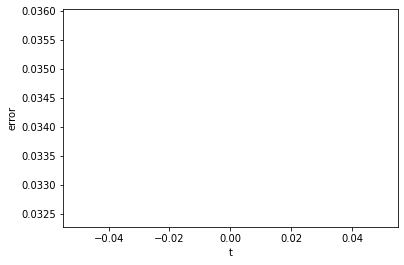

solucion: [184.43279068948928, 106.1838142087167]
fitness: 0.03414928470515122
generaciones: 0
err inicial: 0.03414928470515122 - err final: 0.03414928470515122


In [ ]:
#Problema 1
sys_eq = [[0.01, 0.02],
          [0.02, 0.05]]

b = [4,9]

generation_interval = [50,250]

ga = GeneticAlgorithm(sys_eq, b, generation_interval)
ga.execute()

**Solucion al ejercicio:**
- Se necesitan extraer:
  - 186.597 toneladas de la mina I
  - 105.030 toneladas de la mina II

**Analisis de los resultados:**
- El rango para escoger los valores aleatorios es lo suficientemente corto para que se pueda encontrar la solucion rapido.
- La grafica del error aparece vacia porque se encontro la solucion en la primera generacion. 

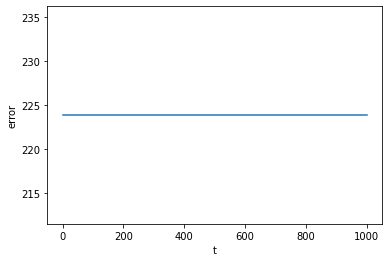

solucion: [5065.9446169516705, 2911.187643209167, 2965.121651549055]
fitness: 223.86022013194452
generaciones: 1000
err inicial: 223.86022013194452 - err final: 223.86022013194452


In [ ]:
#Problema 2
sys_eq = [[16.98, 9.00, 9.00],
          [15.90, 8.72, 8.52],
          [14.08, 8.20, 8.73]]

b = [138900, 131220, 121280]

generation_interval = [2800,5100]

ga = GeneticAlgorithm(sys_eq, b, generation_interval)
ga.execute()

**Solucion al ejercicio:**
- Para solucionar el sistema de ecuaciones:
  - A ~ 5065.94
  - P ~ 2911.18
  - V ~ 2965.12

**Metodo para acercarnos al intervalo:**
- Para acercarnos al intervalo correcto para resolver el ejercicio, se utilizo el valor del error ya que este indica que tan lejos estamos de la solucion.

**Analisis de los resultados:**
- El rango para escoger los valores aleatorios es demasiado grande. Ademas, hay una variables mas que en ejercicio anterior, lo que complica encontrar una buena solucion.
- El error tan grande demuestra que estos algoritmos no son los mejores para este tipo de problemas.
- Como se puede ver en la grafica, el error es constante y esto puede deberse a se genera un muy buen valor dentro de la inicializacion aleatoria y este valor estan bueno que se va pasando por elitismo a lo largo de las generaciones.
- No hay muchos valores que compitan con ese error(el que aparece en la grafica) porque cuando se inicia la primera poblacion es toda aleatoria pero la poblacion del resto de generaciones es derivada los agentes ya existentes.
- La situacion anterior es la razon por la que es muy probable que en el primer ejercicio, el mejor individuo salga de la generacion 0 como queda demostrado en los resultados.

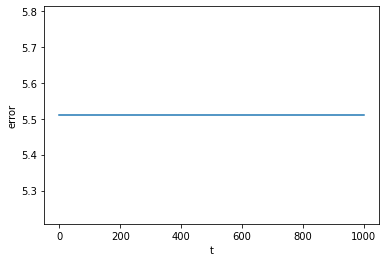

solucion: [0.6539505704903662, 0.03762127974283003, 2.090927615982292, 1.7429201640161676]
fitness: 5.510261582521094
generaciones: 1000
err inicial: 5.510261582521094 - err final: 5.510261582521094


In [ ]:
#Problema 3
sys_eq = [[-1,  1,  1,  1],
          [-3,  1,  2,  1],
          [-1,  1, -2,  2],
          [ 1, -3,  3, -3]]

b = [4, 4, 3, 2]

generation_interval = [0,3]

ga = GeneticAlgorithm(sys_eq, b, generation_interval)
ga.execute()

**Solucion al ejercicio:**
- Para solucionar el sistema de ecuaciones:
  - X1 ~ 0.6539
  - X2 ~ 0.0376
  - X3 ~ 2.0909
  - X4 ~ 1.7429

**Analisis de los resultados:**
- El rango para escoger los valores aleatorios no es muy grande pero hay 4 variables lo que desencadena en que no se llege a una solucion dentro de la tolerancia minima
- El error tan grande demuestra que estos algoritmos no son los mejores para este tipo de problemas.
- La grafica constante, obedece al mismo fenomeno explicado anteriormente. En la primera generacio se crean muchos individuios muy variados, lo que hace que sea muy probable que el mejor individuo salga de la generacion 0 y constantemente elegido por elitismo a lo largo de estas.